# MATH7002 Advanced Statistical methods
## Worksheet 7

1. Using the code in Lectures, how many water caches are needed to cross a desert 3 units wide?

In [1]:
Jeep.distance = function(r) sum(1/(2*(1:r) - 1))

In [7]:
Cross.desert = function(d){
    # i is the number of water cache
    i = 1
    # a is the distance we can travel based on the water cache
    a = 1
    # a < d means we need to increase the number of water cache
    while(a < d){
        i = i + 1
        # here 1 / (2*i - 1) is the increament of distance after we build the new 
        # water cache
        a = a + 1 / (2 * i - 1)
    }
    return(i)
}

In [8]:
Cross.desert(2)

[1] 8

In [9]:
Cross.desert(3)

[1] 57

2. How many for 4 units? (You can try larger the 4, but it will rapidly increase in time taken)

In [10]:
Cross.desert(4)

[1] 419

In [11]:
Cross.desert(50)

## Note

$$\sum_{i=1}^n \frac{1}{2i-1} = H_{2n-1} - \frac{1}{2} H_{n-1}$$

where $H_n$ is the $n$-th *Harmonic Number*;

$$H_n = \sum_{i=1}^n \frac{1}{i}$$

In `R` we can compute Harmonic numbers using

In [12]:
harmonic = function(x) digamma(x+1) - digamma(1)

In [15]:
jeep2 = function(x) harmonic(2*x-1) - harmonic(x-1)/2

In [17]:
# If we just have seven water cache, the distance we can travel is 1.952
jeep2(7)

[1] 1.955134

In [16]:
# If we have 8, the distance we can travel is 2.02 
jeep2(8)

[1] 2.0218

3. Write a function (`jeep2`) to compute the distance travelled using $n$ water caches using this function.

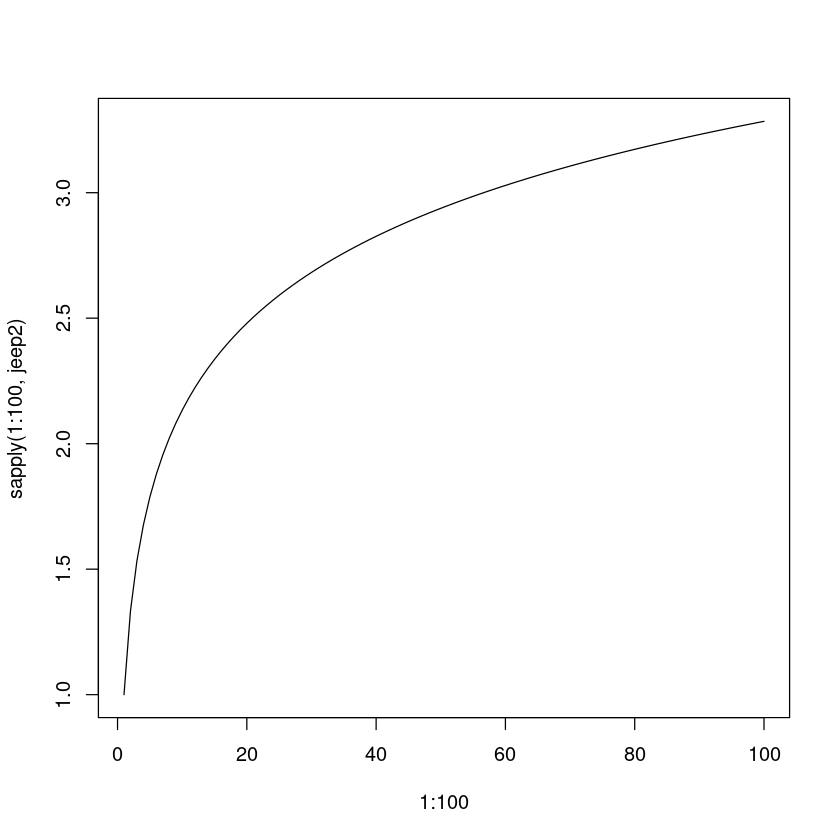

In [23]:
# The trend of water cache and the travel distance 
plot(1:100, sapply(1:100, jeep2), type='l')

In [26]:
# record the time you cost for this line of code 
system.time(Cross.desert(20))

Timing stopped at: 65.48 0 65.47



4. The `uniroot` function can be used to find the roots of nonlinear equations. For example, we can find the value of `x` such that `jeep2(x)=2` using the following code. Find the number of caches needed to cross a desert of width 10.

In [27]:
jeep2 = function(n) harmonic(2*n-1) - harmonic(n-1)/2

In [29]:
uniroot(function(x) jeep2(x)-10, interval=c(1,1000), extendInt = "upX")

$root
[1] 68100150

$f.root
[1] 1.776357e-15

$iter
[1] 31

$init.it
[1] 23

$estim.prec
[1] 6.106496e-05

5. In a particular workshop 4 workers (A-D) are to be allocated to
  4 machines (W-Z). The following table shows the measures of
  efficiency of each worker on each machine as a *cost*. Find the
  optimal allocation of workers to machines.

In [30]:
library(clue)

In [36]:
mach = matrix(c(6, 5, 3, 2, 
                7, 4, 2, 3, 
                9, 3, 5, 4, 
                7, 2, 6, 7) , ncol=4, byrow=TRUE)

rownames(mach) <- LETTERS[1:4] 
colnames(mach) <- LETTERS[23:26] 
solve_LSAP(mach, maximum = FALSE)

Optimal assignment:
1 => 4, 2 => 3, 3 => 2, 4 => 1

6. The chief detective of the city's investigation bureau has just been
assigned 5 new cases (A-E). At present, 5 members of the detective staff
have yet to be assigned investigations (1--5). 
The cases just handed to the chief detective require different types of experience and the detectives have different levels of suitability for them.

The chief detective has assigned *performance* values of each detective for each case as in the following table. (larger is better)

In [37]:
detect <- matrix(c(6, 7, 0, 0, 4, 
               8, 9, 0, 2, 4, 
               2, 1, 6, 4, 5, 
               4, 3, 5, 5, 7, 
               0, 5, 4, 6, 5)  , ncol=5, byrow=TRUE)
rownames(detect) <- LETTERS[1:5]
colnames(detect) = 1:5
#kable(detect, caption="")
solve_LSAP(detect, maximum = TRUE)

Optimal assignment:
1 => 1, 2 => 2, 3 => 3, 4 => 5, 5 => 4

Assuming the performance measure is additive, using the Hungarian
algorithm, find an assignment of
detectives to cases which **maximises** the total value of the performance
measure.

In [38]:
# Recap the Hungarian Algorithm
# Step1: subtracts each row's minimum from all elements in that row 
# sweep(), 
# Here the second parameter 1 means the rows
X = sweep(mach, 1, apply(mach, 1, min)) # Every row has at least one zero
# Step2: subtracts each column's minimum from all elements in that column 
# Here we need to pass X, which is the result comes from the first step
X = sweep(X, 2, apply(X, 2, min))

In [39]:
X

,W,X,Y,Z
A,0,3,1,0
B,1,2,0,1
C,2,0,2,1
D,1,0,4,5
